# Control of a Reverse Osmosis Desalination Process

Maryanne Fisher, William Mahoney, Christopher Pulmano, Kevin Weaver  
Final Project for CBE 30338, Spring 2017


## Problem Statement

<p style="text-align:justify">
Currently, approximately 1% of the world population is dependent on desalinated water to meet daily needs, but “the UN expects that 14% of the world population will encounter water scarcity by 2025” [1]. Clearly, by this estimation, there is a need to develop water purification processes on a larger scale. Currently in the United States, there are approximately 300 desalination plants, with 120 in Florida, and less than 40 in Texas and California [4]. In recent years due to frequent drought conditions in the state of California, a push for new methods to find fresh water sources has increased. In many places, such as Israel and California, desalination is possibly the only large-scale source of freshwater moving forward.<br>
<br>
There are a variety of techniques currently being developed for desalination, the most promising of which is reverse osmosis filtration, in which a semipermeable membrane is used to force water from a high to low salt concentration atmosphere. While reverse osmosis is cheap compared to other desalination techniques, it is still prohibitively expensive when compared to wastewater or freshwater (e.g. lakes and rivers) processing [2]. Reverse osmosis plants tend to require less energy than other desalination techniques. The reverse osmosis plants also are responsible for the discharge of the concentrated brine and sludge. The chemical agents used in the process require the water to be treated both before and after separation, especially to avoid membrane fouling [5].<br>
<br>
While it would be simple to solely maximize cost efficiency in order to scale up desalination on a global level, there are many environmental concerns that also need to be taken into account. Thus, a balance must be struck between the cost, the environmental footprint, and the efficiency of the process.  The main technical issue facing the optimization of any reverse osmosis process, such as desalination, is the tradeoff between the effective yield of a certain reverse osmosis process and the energy cost and membrane fouling of said process. High yields (up to 50%) of freshwater can be obtained from a given amount of salt water, but exposing desalination membranes to the stresses necessary for these high yields can cause them to “foul”, or decrease in production capacity [3].<br>
<br>
The goal of the project is to develop a control system for a simplified reverse osmosis process. This is accomplished by controlling the conductivity (a measure of salt content) of the water through manipulation of the system pressure. The pH of the inlet stream is the disturbance variable for the system. The project draws parameters for flow rates and equipment from a San Diego Desalination Plant [6]. The project models the system over a long period of time and utilizes a PI controller. While membrane fouling was not simulated, the effect of water pretreatment was studied in order to minimize pH disturbances.
</p>

## Theoretical Development
<p style="text-align:justify">
One of the main control variables used throughout desalination processes and more generally, reverse osmosis, is the pumping pressure. The pump pressure is of the utmost importance as the pressure is the driving force that actually allows for the reverse osmosis to occur. There are two main components of the pump pressure - the osmotic pressure, 𝛑, and the pressure needed to pass the fluid through the membrane, P.  The pressure, P, must be greater than 𝛑 in order to overcome the osmotic pressure. The osmotic pressure is defined as the minimum pressure needed to prevent the flow of water in the reverse direction of the process (due to osmosis) and is equal to:</p>

$$\pi = − \frac{RT}{V_{water}}ln(\frac{x_1}{x_2})$$					

<p style="text-align:justify">
where x1 is equal to the mole fraction of water in the high salt inlet stream and x2 is equal to that in the low salt outlet stream. Additionally, P can be found using the Hagen-Poiseuille equation:</p>

$$P = \frac{8 \mu LQ}{\pi r^4}$$

<p style="text-align:justify">
where 𝛍 is the dynamic viscosity of the fluid, r is the pipe radius, and Q is the volumetric flow rate. Thus, summing these two equations gives an expression for $P_{pump}$:</p>

$$P_{pump}=P+\pi=\frac{8 \mu LQ}{\pi r^4}−\frac{RT}{V}ln(\frac{x_1}{x_2})$$		                  

<p style="text-align:justify">
In order to develop the transfer functions necessary for controlling the process, differential equations needed to be derived from the theory. This, however, proved to be difficult as none of the primary governing equations for reverse osmosis involved time derivatives. While these equations were helpful in developing an understanding of the system and calculating initial conditions for the RO plant, more information was needed to develop the transfer functions necessary for adequate control.<br>
<br>
Fortunately, research revealed that numerous scientific papers have studied reverse osmosis control and, via least squares regression and other data fitting methods, developed similar (if not identical) transfer functions for their models. The papers compared the predictions from their models to experimental data they had collected and found that their models matched fairly accurately. Most of the papers used conductivity as their primary controlled variable. While at first glance, conductivity might not seem to have very much to do with the salinity content of water, however in practice, it is an effective way to measure the salt concentration of water, as the salt ions work to carry an electrical current and directly affect conductivity. While the direct correlation between salt concentration and conductivity is clear, the equations governing this correlation are very complicated, and differ with varying salinity concentrations [7]. This is another reason why empirical relations prove useful in tackling this control problem. 
<br><br>
An issue that comes with using conductivity as a marker for salinity is that pH can also heavily impact measured conductivity. pH is a measure of the concentration of hydrogen ions in a solution, so intuitively as pH decreases (corresponding to an increase in H+ ion concentration) conductivity will increase. However, as pH increases above 7, conductivity does not decrease, as expected, but actually starts to increase again. This is because at higher pH’s, the increase in OH- ions overpowers the decrease in H+ ions. Therefore, conductivity is lowest at pH 7, and increases as the pH deviates from 7. In order to simplify this process control model, and because the pH of ocean water in the San Diego area is steady at around 8.15, it is assumed that the pH of the inlet and outlet streams will never dip below 7. With this simplification in place, it can be said that increasing pH decreases conductivity, which allows for proper integration into the control scheme. In this case, the effects of pH, acting as the disturbance variable, and pressure, acting as the manipulated variable, sum together to decrease conductivity. The following Laplace transfer functions were determined from literature [8]:</p>

$$\frac{C}{P} = G_p = \frac{−0.51*(0.35s + 1)}{0.213*s^3 + 0.7*s + 1}$$

$$\frac{C}{pH} = G_d = \frac{−57*(0.32s + 1)}{0.6*s^3 + 1.8*s + 1}$$

<p style="text-align:justify">
Where $G_p$ is the process transfer function and $G_d$ is the disturbance transfer function. An additional transfer function used was $G_c$, which corresponds to the PI controller. The tuning for the PI controller transfer function are determined in the Results section below and take the following form.</p>

$$G_c = K_c(1 + \frac{1}{\tau_I}) $$

$$G_c = \frac{-1.26 s - 0.9}{1.4s}$$

<p style="text-align:justify">
A PI controller was deemed adequate for the control task at hand, because there was assumed to be no abrupt changes in the pH or pumping pressure. Because the process and disturbance transfer functions were determined empirically, it was not necessary to include constants for a current/pressure transducer, internal setpoints, and transmission signals as these constants were built into the existing transfer functions cited from literature. Although it was assumed that the transmission signal is built into the cited transfer functions, this control loop was designed with a two minute time delay in the transmission of the conductivity measurement to the controller. Therefore that transfer function takes the following form:</p>

$$G_m = \frac{-s + 1}{s + 1}$$


<p style="text-align:justify">
In addition to obtaining the transfer functions from literature, some of the empirical data used in these studies was also required in order to determine an accurate setpoint for the model. It was important to determine the proper setpoint for conductivity that most matched real world data. The setpoint was found by interpolating trends of total dissolved solids (TDS) as a function of conductivity [9]. Matching the empirical data with the EPA regulations for acceptable drinking water allowed for an appropriate setpoint of 50 $\mu S/cm$ for the conductivity in the model. When interpolated using the data in Appendix B, this conductivity is associated with approximately 16 mg/L of NaCl in water, which is well within the acceptable range of 0-50 mg/L. 
<br><br>
In order for the control model to accurately describe reverse osmosis desalination, a few assumptions about the entire process had to be made. The first is that no concentration polarization occurs in the inlet stream. This essentially means that the seawater inlet is well-mixed, which is critical for the standard reverse osmosis desalination process. Another assumption is that no membrane fouling occurs. Membrane fouling is a term used to describe the degradation of membrane pores over time by salt particles and other debris. Membrane fouling is not treatable by standard process control protocols, as it requires the temporary shutdown of the desalination plant, so it was ignored in this modeling. The final set of assumptions was a set of variables that remain constant throughout the desalination process, including temperature and flow rate.
<br><br>
Below is a visual summary of the system being controlled (Figure 1) and the corresponding block diagram of the control system within the Laplace domain (Figure 2).</p>
<center>
![](ROSysDiagram.png)
<b>Figure 1. RO System Diagram</b>
![](ROBlockDiagramF.png)
<b>Figure 2. RO Feedback Control Block Diagram</b>
</center>




## Results

### PID Class
<p style="text-align:justify">
The following cell hosts the PID class created by Dr. Kantor used to implement PI control over the RO system. This is essential for the simulations in this report.</p>

In [1]:
import matplotlib.pyplot as plt
import numpy as np

class PID:
    """ An implementation of a PID control class for use in process control simulations.
    """
    def __init__(self, name=None, SP=None, Kp=0.2, Ki=0, Kd=0, beta=0, gamma=0, MVrange=(0,100), DirectAction=False):
        self.name = name
        self.SP = SP
        self.Kp = Kp
        self.Ki = Ki
        self.Kd = Kd
        self.beta = beta
        self.gamma = gamma
        self.MVrange = MVrange
        self.DirectAction = DirectAction
        self._mode = 'inAuto'
        self._log = []
        self._errorP0 = 0
        self._errorD0 = 0
        self._errorD1 = 0
        self._lastT = 0
        self._currT = 0
        
    def auto(self):
        """Change to automatic control mode.
        """
        self._mode = 'inAuto'
        
    def manual(self):
        """Change to manual control mode. In manual mode, the setpoint tracks the process 
        variable to provide bumpless transfer on return to auto.
        """
        self._mode = 'inManual'
        
    def _logger(self,t,SP,PV,MV):
        self._log.append([t,SP,PV,MV])
        
    def plot(self):
        """Create historical plot of SP,PV, and MV using the controller's internal log file.
        """
        dlog = np.asarray(self._log).T
        t,SP,PV,MV = dlog
        plt.subplot(2,1,1)
        plt.plot(t,PV,t,SP)
        plt.title('PV - Conductivity')
        plt.xlabel('Time (sec)')
        plt.ylabel('Conductivity Deviation ($\mu S/cm$)')
        plt.legend(['PV','SP'])
        plt.subplot(2,1,2)
        plt.plot(t,MV)
        plt.title('MV - Feed Pressure')
        plt.xlabel('Time (sec)')
        plt.ylabel('Pressure Deviation (psi)')
        plt.tight_layout()
    
    @property
    def beta(self):
        """beta is the setpoint weighting for proportional control where the proportional error
        is given by error_proportional = beta*SP - PV. The default value is one.
        """
        return self._beta
        
    @beta.setter
    def beta(self,beta):
        self._beta = max(0.0,min(1.0,beta))
        
    @property
    def DirectAction(self):
        """DirectAction is a logical variable setting the direction of the control. A True
        value means the controller output MV should increase for PV > SP. If False the controller
        is reverse acting, and ouput MV will increase for SP > PV. IFf the steady state
        process gain is positive then a control will be reverse acting. 
        
        The default value is False.
        """
        return self._DirectAction
    
    @DirectAction.setter
    def DirectAction(self,DirectAction):
        if DirectAction:
            self._DirectAction = True
            self._action = +1.0
        else:
            self._DirectAction = False
            self._action = -1.0
    
    @property
    def gamma(self):
        """gamma is the setpoint weighting for derivative control where the derivative error
        is given by gamma*SP - PV.  The default value is zero. 
        """
        return self._gamma
    
    @gamma.setter
    def gamma(self,gamma):
        self._gamma = max(0.0,min(1.0,gamma))
    
    @property
    def Kp(self):
        """Kp is the proportional control gain.
        """
        return self._Kp
    
    @Kp.setter
    def Kp(self,Kp):
        self._Kp = Kp
    
    @property
    def Ki(self):
        """Ki is the integral control gain.
        """
        return self._Ki
        
    @Ki.setter
    def Ki(self,Ki):
        self._Ki = Ki
    
    @property
    def Kd(self):
        """Kd is the derivative control gain.
        """
        return self._Kd
    
    @Kd.setter
    def Kd(self,Kd):
        self._Kd = Kd
        
    @property
    def MV(self):
        """MV is the manipulated (or PID outpout) variable.
        """
        return self._MV
    
    @MV.setter
    def MV(self,MV):
        self._MV = max(self._MVmin,min(self._MVmax,MV))
        
    @property
    def MVrange(self):
        """range is a tuple specifying the minimum and maximum controller output.
        Default value is (0,100).
        """
        return (self._MVmin,self._MVmax)
    
    @MVrange.setter
    def MVrange(self,MVrange):
        self._MVmin = MVrange[0]
        self._MVmax = MVrange[1]

    @property
    def SP(self):
        """SP is the setpoint for the measured process variable.
        """
        return self._SP
    
    @SP.setter
    def SP(self,SP):
        self._SP = SP
        
    @property
    def PV(self):
        """PV is the measured process (or control) variable.
        """
        return self._PV
    
    @PV.setter
    def PV(self,PV):
        self._PV = PV

    def update(self,t,SP,PV,MV):
        self.SP = SP
        self.PV = PV
        self.MV = MV 
        if t > self._lastT:
            dt = t - self._lastT
            self._lastT = t
            if self._mode=='inManual':
                self.SP = PV
            self._errorP1 = self._errorP0
            self._errorP0 = self.beta*self.SP - self.PV
            self._errorI0 = self.SP - self.PV            
            self._errorD2 = self._errorD1
            self._errorD1 = self._errorD0
            self._errorD0 = self.gamma*self.SP - self.PV
            if self._mode=='inAuto':
                self._deltaMV = self.Kp*(self._errorP0 - self._errorP1) \
                    + self.Ki*dt*self._errorI0 \
                    + self.Kd*(self._errorD0 - 2*self._errorD1 + self._errorD2)/dt
                self.MV -= self._action*self._deltaMV
        self._logger(t,self.SP,self.PV,self.MV)
        return self.MV 

### Implementing Control - Closed Loop Transfer Functions

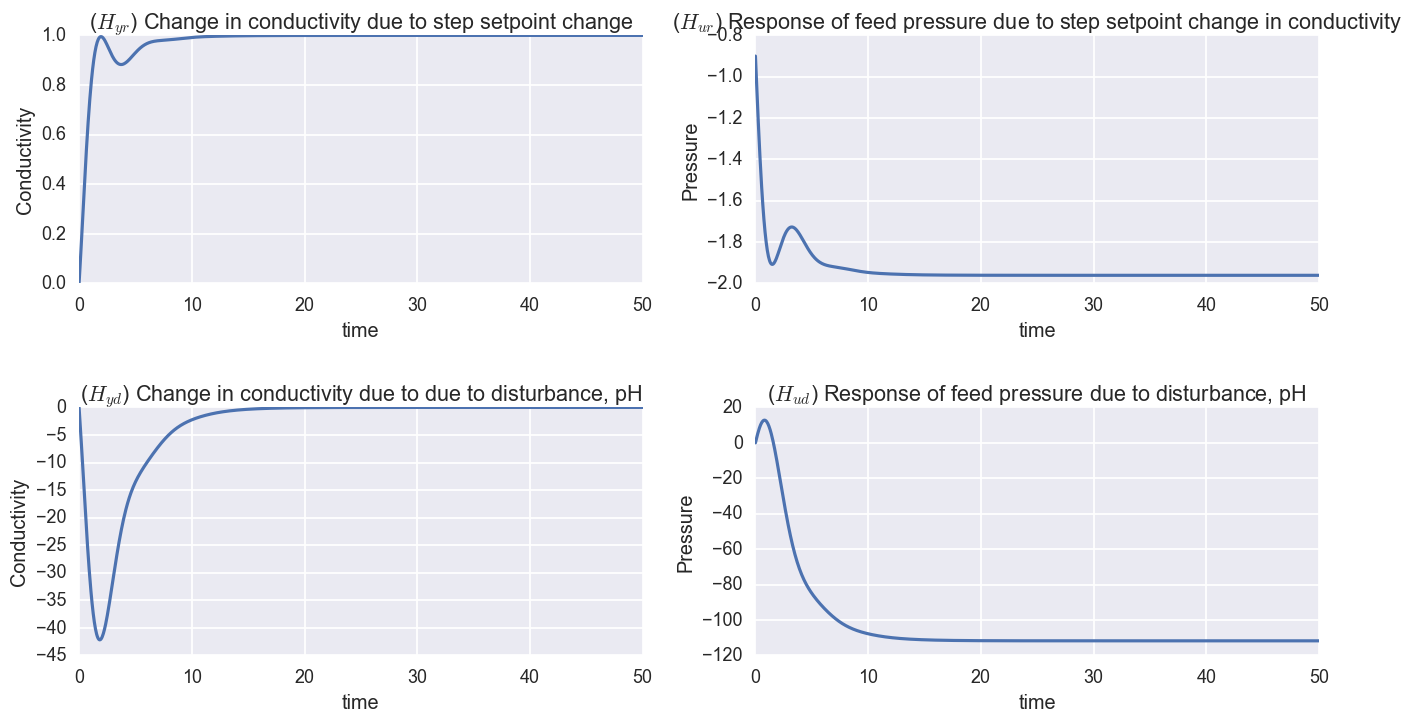

In [2]:
%matplotlib inline
import seaborn as sns
import control
import matplotlib.pyplot as plt
sns.set_context('talk')

def sim(Kc = -0.9, tauI = 1.4):
    
    # G11 pressure to conductivity
    Gp = control.tf([-0.1785, -0.51],[0.213,0.7,1])
    
    # G22 pH to conductivity
    Gd = control.tf([-18.24, -57],[0.6,1.8,1])
    
    Km = 1 #Km assumed to be 1 because assuming dynamics are accounted for in literature Gp
    num,den = control.pade(2,n=1) # accounting for the time delay
    Gm = Km*control.tf(num,den)

    Gc =  Kc*control.tf([tauI,1],[tauI,0])
    
    # Closed loop transfer functions
    Hyr = Gp*Gc*Km/(1+Gp*Gc*Gm)
    Hur = Gc*Km/(1+Gc*Gp*Gm)
    Hyd = Gd/(1+Gp*Gc*Gm)
    Hud= -Gc*Gd*Gm/(1+Gc*Gp*Gm)
    # Time vector
    t = np.linspace(0,50,1000)

    plt.figure(figsize=(16,8))

    plt.subplot(2,2,1)
    t,y = control.step_response(Hyr,t)
    plt.plot(t,y)
    plt.title('($H_{yr}$) Change in conductivity due to step setpoint change')
    plt.ylabel('Conductivity')
    plt.xlabel('time')
    
    plt.subplot(2,2,2)
    t,u = control.step_response(Hur,t)
    plt.plot(t,u)
    plt.title('($H_{ur}$) Response of feed pressure due to step setpoint change in conductivity')
    plt.ylabel('Pressure')
    plt.xlabel('time')

    plt.subplot(2,2,3)
    t,y = control.step_response(Hyd,t)
    plt.plot(t,y)
    plt.title('($H_{yd}$) Change in conductivity due to due to disturbance, pH')
    plt.ylabel('Conductivity')
    plt.xlabel('time')

    plt.subplot(2,2,4)
    t,u = control.step_response(Hud,t)
    plt.plot(t,u)
    plt.title('($H_{ud}$) Response of feed pressure due to disturbance, pH')
    plt.ylabel('Pressure')
    plt.xlabel('time')
    plt.subplots_adjust(hspace=0.5)
    
from ipywidgets import interact, fixed
interact(sim,Kc = (-30,10,0.1),tauI=(0.1,50,0.1));
# Interactive sliders to tune the PI controller, first using Z-N method as a base.
# Custom tuned after to limit overshoot
# Sliders set to tuning parameters used for simulation: Kc= -0.9, tauI= 1.40

#### Discussion
<p style="text-align:justify">
The upper two graphs depict changes in the system due to a change in the setpoint. The desired setpoint is achieved by changing the corresponding manipulated variable, feed pressure, as seen in the upper right graph. The trend follows such that when the conductivity setpoint is increased in a step-like manner, the pressure of the system needed to be decreased. The bottom two graphs depict the change in conductivity due to a positive change in the disturbance variable, pH. When first disturbed, the conductivity goes down, but quickly comes back to its original value as seen in the lower left plot. The corresponding pressure graph shows that the response to this positive step change in pH leads to a decrease in pressure in order to maintain the conductivity.
<br><br>
This system was tuned using the Ziegler-Nichols method for a PI controller as a basis. Upon reaching tuning measures using this method, the system was then custom tuned to yield better results. This was determined to be optimal because of the little to no overshoot of the conductivity with a change in setpoint. This is important because overshooting a new conductivity setpoint would prove hazardous when the end product is potable drinking water. These tuning parameters are important takeaways for the implementation of the PI controller:
</p>

$$K_c = -0.9$$
$$ \tau_I = 1.4$$



### Implementing PID Control  and Simulating in the Time Domain

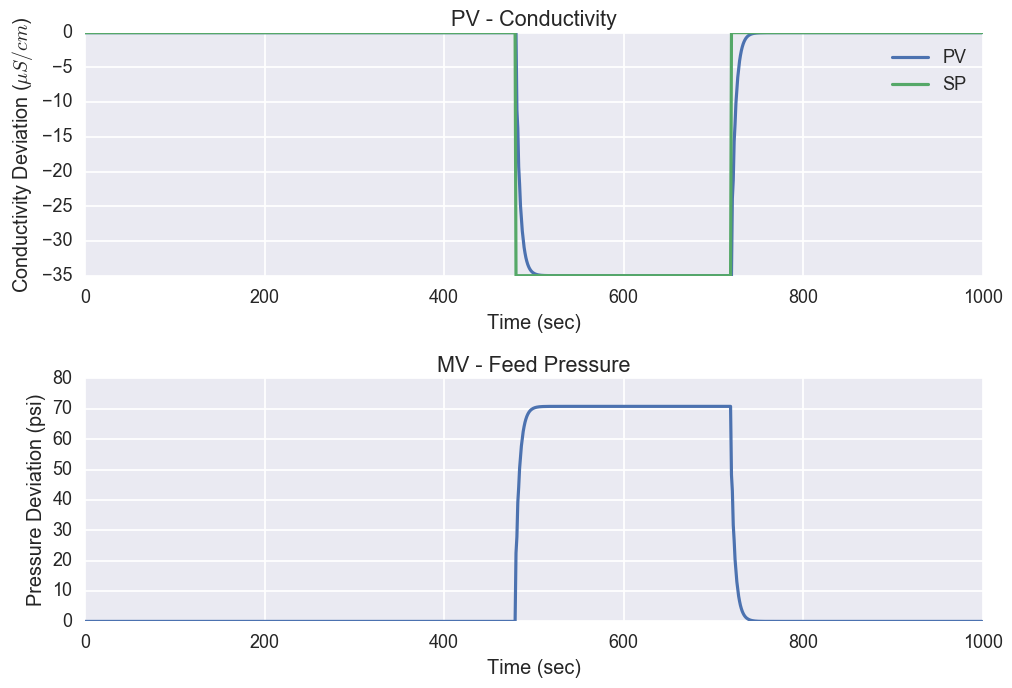

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import control
# seaborn improves the plotting output
import seaborn as sns
sns.set_context('talk')

# Repeat set up of transfer functions

# G11 pressure to conductivity
Gp = control.tf([-0.1785, -0.51],[0.213,0.7,1])
#G22 pH to conductivity
Gd = control.tf([-18.24, -57],[0.6,1.8,1])

num,den = control.pade(2,n=1) # accounting for the time delay of 2
Km = 1
Gm = Km*control.tf(num,den)

# Tuned Kc and tauI
Kc = -0.9
tauI = 1.4
Gc =  Kc*control.tf([tauI,1],[tauI,0])

Hyr = Gp*Gc*Km/(1+Gp*Gc*Gm)
Hur = Gc*Km/(1+Gc*Gp*Gm)
Hyd = Gd/(1+Gp*Gc*Gm)
Hud= -Gc*Gd*Gm/(1+Gc*Gp*Gm)

# Set initial conditions - at steady state value, so no deviation
# Note naming convention - "d" included in variable names indicating deviation value
Cd0 = 0
pHd0 = 0
IC = [Cd0,pHd0]

# do simulation at fixed time step
tstep = 1

# Permeate conductivity setpoint
Cdsp = 0

# Configuration of controller, use PID class as PI by setting Kd = 0.
myPID = PID(Kp=0.9,Ki=0.9/1.4,Kd=0,MVrange=(-900,1500),DirectAction=True)

## Start simulation ##
Cd, pHd = IC
Pfd = 0

# Steady state values used as a baseline - taken from literature experimental values
# same source as empirical transfer functions
Css = 435
Pfss = 900

# Preallocation of lists used
C = []
Pf = []
Csp = []

tstart = 0
tchange = 480 # end of SS, no deviation
tstopstep = 720 # end of step change, return to original SS

tvector1 = np.arange(tstart,tchange,tstep)

for t in tvector1:
    Pfd = myPID.update(t,Cdsp,Cd,Pfd)
    tmp, Cdarray, tmp = control.forced_response(Gp,(t,t+tstep), Pfd,Cd0)
    Cd=Cdarray[1]
    # Add deviation value to SS value to plot in next section
    Csp.append(Cdsp+Css)
    C.append(Cd+Css)
    Pf.append(Pfd+Pfss)
    
# Step change in setpoint demonstrating PI response
Cdspnew =-35

tvector2 = np.arange(tchange,tstopstep,tstep)
for t in tvector2: 
    Pfd = myPID.update(t,Cdspnew,Cd,Pfd)
    tmp, Cdarray, tmp = control.forced_response(Gp,(t,t+tstep), Pfd)   
    Cd=Cdarray[1]
    # Add deviation value to SS value to plot in next section
    Csp.append(Cdspnew+Css)
    C.append(Cd+Css)
    Pf.append(Pfd+Pfss)

tvector3 = np.arange(tstopstep,1000,tstep)

for t in tvector3: 
    Pfd = myPID.update(t,Cdsp,Cd,Pfd)
    tmp, Cdarray, tmp = control.forced_response(Gp,(t,t+tstep), Pfd)   
    Cd=Cdarray[1]
    # Add deviation value to SS value to plot in next section
    Csp.append(Cdsp+Css)
    C.append(Cd+Css)
    Pf.append(Pfd+Pfss)

# bring all times to one vector for use in next section
tvector = np.concatenate((tvector1,tvector2,tvector3))

# plot controller log
myPID.plot()



#### Discussion
<p style="text-align:justify">
The two graphs above show the deviation in the time domain when the setpoint value is changed. From an initial steady state, the setpoint is changed to a new setpoint, thus resulting in a deviation in conductivity. This deviation is constant because it then reaches a new steady state. The corresponding pressure deviation graph changes as predicted in the graphs of the closed loop transfer function responses - feed pressure must increase as conductivity decreases. The set point is then brought back to its original steady state value, with the same relationship repeating in the opposite direction - feed pressure must decrease as conductivity increases.</p>

### Simulation Compared to Empirical Data

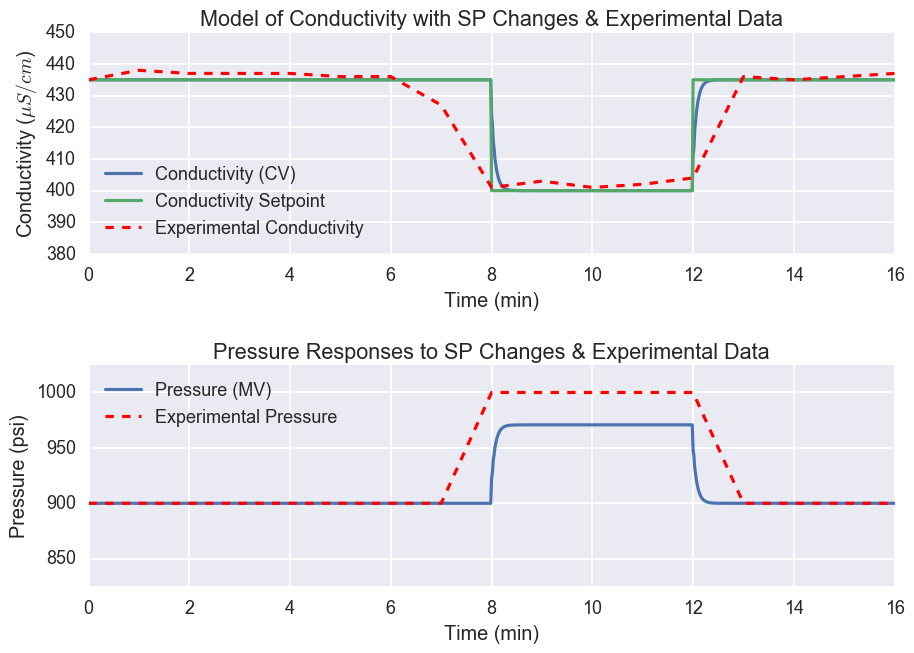

In [4]:
######## Please note: In order for this section to work, the previous section  ########
######## "Implementing PID Control and Simulating Time Domain" must be run     ########

# convert time to minutes
tminvector = tvector/60

# Empirical data used to compare our control / model
empPf = (900, 900, 900, 900, 900, 900, 900, 900, 1000, 1000,
         1000, 1000, 1000,900,900,900,900,900)
empC = (435,438,437,437,437,436,436,427,401,403,401,402,404,
       436,435,436,437,435)
empt = range(len(empPf))

plt.subplot(2,1,1)
plt.plot(tminvector,C,tminvector,Csp,empt,empC,'--r')
plt.xlim(0,16)
plt.ylim(380,450)
plt.xlabel('Time (min)')
plt.ylabel('Conductivity ($\mu S/cm$)')
plt.legend(('Conductivity (CV)','Conductivity Setpoint',
           'Experimental Conductivity'),loc=0)
plt.title('Model of Conductivity with SP Changes & Experimental Data')

plt.subplot(2,1,2)
plt.plot(tminvector,Pf,empt,empPf,'--r')
plt.xlim(0,16)
plt.ylim(825,1025)
plt.xlabel('Time (min)')
plt.ylabel('Pressure (psi)')
plt.legend(('Pressure (MV)','Experimental Pressure'),loc=0)
plt.title('Pressure Responses to SP Changes & Experimental Data')
plt.subplots_adjust(hspace = 0.5)

#### Discussion
<p style="text-align:justify">
The deviation graphs as in the previous section can only tell so much without a reference point. Experimental data is used to serve as this reference for the steady state values. The values used to compare are found in Appendix A. The figures above show the deviations in the section above applied to the actual values at steady state. The data is also overlaid to compare the model used to simulate the RO process. As seen in the plots, the model does quite well, reaching the drop in set point in the same time frame as what occurs in the experiment referenced in this report [8]. However, there is a difference in the response of the manipulated variable between the experimental data and the modelled simulation. The simulation predicts a lower required pressure then what was found experimentally under the same conditions. The relative error, however is about 2.5%, which is not too far off in this simulation.
</p>

### Simulation at Acceptable Conductivity Levels 

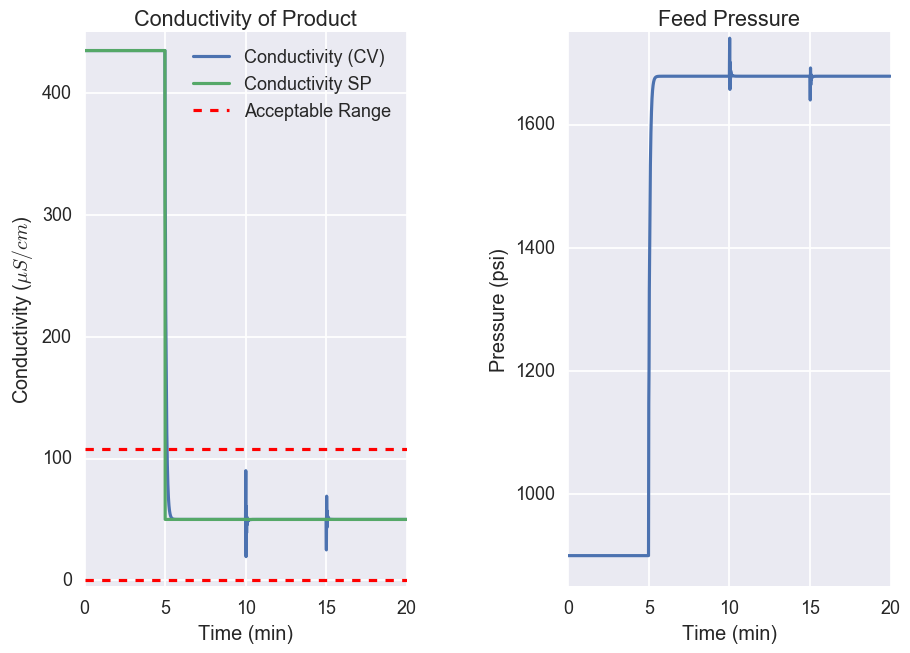

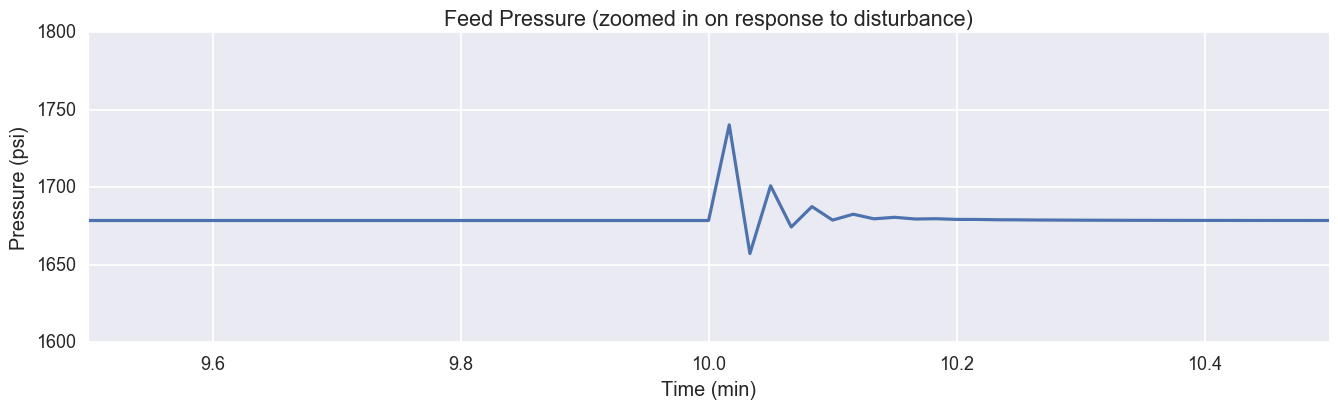

In [5]:
# Configuration of controller, use PID class as PI by setting Kd = 0.
roPID = PID(Kp=0.9,Ki=0.9/1.4,Kd=0,MVrange=(-900,1000),DirectAction=True)

tstart = 0
tchange = 300
tstep = 1

# New vector of times to run through
tvector1 = np.arange(tstart,tchange,tstep)

# Pre-allocate array again for new simulation
C = []
Csp = []
Pf = []

#Start simulation
Cd, pHd = IC # use same initial conditions as in previous simulation - no deviation from SS values
Cdsp = 0 # want to stay at this SS value
Pfd = 0

# also using the same steady state values as before as a baseline, Css & Pfss

for t in tvector1: 
    Pfd = roPID.update(t,Cdsp,Cd,Pfd)
    tmp, Cdarray, tmp = control.forced_response(Gp,(t,t+tstep), Pfd)
    Cd=Cdarray[1]
    Csp.append(Cdsp+Css)
    C.append(Cd+Css)
    Pf.append(Pfd+Pfss)

# Create new setpoint in conductivity, for acceptable salinity in water
Cdsp = -385 # acceptable conductivity is 435 minus 385 = 50 microSiemens/cm
tstop = 1200
tvector2 = np.arange(tchange,tstop,tstep) 

for t in tvector2:
    Pfd = roPID.update(t,Cdsp,Cd,Pfd)
    tmp, Cdarray, tmp = control.forced_response(Gp,(t,t+tstep), Pfd)
    if t==600:
        Cd = Cdarray[1]+40
    elif t==900:
        Cd = Cdarray[1]-25
    else:
        Cd=Cdarray[1]
    Csp.append(Cdsp+Css)
    C.append(Cd+Css)
    Pf.append(Pfd+Pfss)

# convert time to minutes
tminvector = np.concatenate((tvector1,tvector2))/60

plt.subplot(1,2,1)
#108 was calculated to be the conductivity associated with chosen max salinity allowed in drinking water ~50mg/L.
plt.plot(tminvector,C,tminvector,Csp, (0,tstop),(108,108),'--r',(0,tstop),(0,0),'--r')
plt.xlim(0,20)
plt.ylim(-5,450)
plt.xlabel('Time (min)')
plt.ylabel('Conductivity ($\mu S/cm$)')
plt.legend(('Conductivity (CV)','Conductivity SP','Acceptable Range'),loc=1)
plt.title('Conductivity of Product')

plt.subplot(1,2,2)
plt.plot(tminvector,Pf)
plt.xlim(0,20)
plt.ylim(850,1750)
plt.xlabel('Time (min)')
plt.ylabel('Pressure (psi)')
plt.title('Feed Pressure')
plt.subplots_adjust(wspace = 0.5)

plt.figure(figsize=(16,4))
plt.plot(tminvector,Pf)
plt.xlim(9.5,10.5)
plt.ylim(1600,1800)
plt.xlabel('Time (min)')
plt.ylabel('Pressure (psi)')
plt.title('Feed Pressure (zoomed in on response to disturbance)')

##### Discussion

<p style="text-align:justify">
Now that the simulation and model has been compared to the experimental data, these plots represent a simulation of
the RO system at the desired setpoint. In order to achieve an acceptable level of salinity in drinking water, the conductivity setpoint is set to be 50 $\mu S/cm $. As described in the theoretical development section, this corresponds to about 16 mg/L of salt in water. To maintain this setpoint, the required steady state feed pressure is 1679 psi.
<br><br>
Once the setpoint is reached, disturbances in the conductivity are introduced manually at 10 minutes and 15 minutes in order to simulate a disturbance due to the pH. These disturbances are set to be a deviation of +40 $\mu S/cm$ and -25 $\mu S/cm$, which are relatively exaggerated because such an abrupt, large change in pH would be highly unlikely. Even so, the system is able to respond, increasing pressure for the positive deviation in conductivity or decreasing with a negative deviation, returning it back to the desired setpoint. There is some oscillation in the response returning to the setpoint, but this was determined to be acceptable because it remains within bounds even in this exaggerated case of a disturbance and also is rather short. This response indicates a robust feedback loop, maintaing the conductivity of the permeate at drinking water levels.
</p>

## Conclusion

<p style="text-align:justify">
The goals of this project were overall achieved. A simple RO system in the context of desalination was modelled using empirically found transfer functions from literature. Robust control over conductivity and therefore salinity levels of drinking water was achieved with the consideration of one disturbance variable, pH, and one manipulated variable, feed/pump pressure. This simulation, however, did not look too deeply into control of the throughput of an RO system. Because of how this model was simplified, control over the throughput/flux was neglected because of complexities in how it was coupled with control over the conductivity. As such, conductivity and salinity were focused on. 
<br><br>
Regardless, studying and simulating this RO system shed light on the relationships between various physical characteristics of the system. The desalination process simulated showed the basic relationship between the conductivity of salt in water and pressure, as well as the conductivity and pH. As seen in the closed-loop transfer functions, conductivity has an inverse relationship with both feed pressure and pH. Because a lower conductivity is desired, the pump in RO must be rated appropriately. In order to achieve a conductivity of 50 $\mu S/cm$, the feed must at the very least be able to handle 1679 psi. It should be rated even higher in order to be able to respond to any disturbances and have an operating buffer.
<br><br>
While this simplified RO model was successful in achieving the goals of this project, there are certainly a number of ways it can be improved to address the complexity of the desalination process. The most obvious way to do this might be to start adding in parts of the process this model ignored such as pretreatment of the inlet stream. In reality, desalination plants pretreat their inlet streams. Not only does pretreatment remove particulates and organic matter, it also minimizes the effects of pH. Often, the plants add acid to the inlet streams to bring down the basic ocean water in an attempt to create a uniformly pH inlet stream. This is beneficial to the process control and minimizes membrane fouling (another issue that could be studied to further improve the model).
</p>

## Literature Cited
[1] "Desalination Industry Enjoys Growth Spurt as Scarcity Starts to Bite." Global Water Intelligence. Global Water Intelligence, 2011. Web. 01 May 2017.

[2] Thiel, G. "Salty Solutions: Physics Today: Vol 68, No 6." Physics Today. American Institute of Physics, June 2015. Web. 18 Apr. 2017.

[3] Cooley, Heather, and Newsha, Ajami. "Key Issues for Seawater Desalination in California." The World’s Water (2014): 93-121. Pacific Institute. Web. 18 Apr. 2017.

[4] Scripps' Center for Marine Biotechnology and Biomedicine. Scientific American. Web. 28 April, 2017.

[5] J. Environ. Monit., 2007,9, 805-813. Web. 28 April, 2017. 

[6] Carlsbad Desalination Project. Carlsbad, CA. Web. 2017. 

[7] Standard Methods for the Examination of Water and Wastewater, 20th edition, 1999. 

[8] Alatiqi, I.M. System Identification and Control of Reverse Osmosis Desalination. Desalination, 75. 1989.

[9] Fondriest Environmental Inc. Conductivity, Salinity and Total Dissolved Solids. Fundamentals of Environmental Measurements, 2016. Web. 1 May, 2017.

## Appendices


<h3 align="center"> Appendix A: Step Test Results on Feed Pressure (Selected Values) [8]</h3>

| Feed Pressure (psi) | Permeate Flux (gpm) | Permeate Conductivity ($\mu$S/cm) | 
| :-------: | :----: | :---: |
| 900 | 1.05 | 435 |
| 900 | 1.05 | 438 |
| 900 | 1.05 | 437 |
| 900 | 1.05 | 437 |
| 900 | 1.05 | 437 |
| 900 | 1.05 | 436 |
| 900 | 1.05 | 436 |
| 900 | 1.05 | 437 |
| 1000 | 1.25 | 401 |
| 1000 | 1.25 | 403 |
| 1000 | 1.25 | 401 |
| 1000 | 1.25 | 402 |
| 1000 | 1.25 | 404 |
| 900 | 1.05 | 436 |
| 900 | 1.05 | 435 |
| 900 | 1.05 | 436 |
| 900 | 1.05 | 437 |
| 900 | 1.05 | 435 |

<h3 align="center"> Appendix B: Relationship Between TDS (NaCl) and Conductivity (Selected Values) [9]</h3>

| TDS - NaCl (mg/L) | Conductivity ($\mu S/cm$) |
| :-------: | :----: |
| 10.7 | 23 | 
| 38.04 | 84 |
| 215.5 | 447 |
| 702.1 | 1413 |
